In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
df = pd.read_csv('./시군구.csv')
df.head()

,시도코드,시도,시군구코드,시군구,시점,총인구,20-39세 여성인구,65세 이상 인구,지방소멸위험지수,지방소멸위험분류,위도(x),경도(y)
0,43,충청북도,43760,괴산군,202302,"36,911","1,861","14,037",0.133,5,36.8121,127.7967
1,43,충청북도,43720,보은군,202302,"31,444","1,683","11,885",0.142,5,36.4877,127.7041
2,43,충청북도,43800,단양군,202302,"27,738","1,541","9,728",0.158,5,36.9832,128.3552
3,43,충청북도,43740,영동군,202302,"44,750","2,720","15,859",0.172,5,36.1735,127.7776
4,43,충청북도,43730,옥천군,202302,"49,310","3,234","16,348",0.198,5,36.3051,127.5757


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         228 non-null    int64  
 1   시도           228 non-null    object 
 2   시군구코드        228 non-null    int64  
 3   시군구          228 non-null    object 
 4    시점          228 non-null    int64  
 5   총인구          228 non-null    object 
 6   20-39세 여성인구  228 non-null    object 
 7   65세 이상 인구    228 non-null    object 
 8   지방소멸위험지수     228 non-null    float64
 9   지방소멸위험분류     228 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 17.9+ KB


In [7]:
# 지방소멸위험지수가 낮은 상위 10개 지역 출력
df_sorted = df.sort_values(by='지방소멸위험지수', ascending=True)
top_10_areas = df_sorted.head(10)
print(top_10_areas)

   시도코드    시도  시군구코드   시군구     시점       총인구 20-39세 여성인구 65세 이상 인구  지방소멸위험지수  \
0    47  경상북도  47720   군위군  202302  23,277       1,050    10,101      0.104   
1    47  경상북도  47730   의성군  202302  50,042       2,354    22,310      0.106   
2    46  전라남도  46770   고흥군  202302  61,675       2,959    26,746      0.111   
3    48  경상남도  48890   합천군  202302  41,979       2,007    17,776      0.113   
4    47  경상북도  47920   봉화군  202302  30,048       1,365    12,071      0.113   
5    47  경상북도  47750   청송군  202302  24,245       1,172     9,860      0.119   
6    47  경상북도  47820   청도군  202302  41,664       2,084    16,981      0.123   
7    48  경상남도  48840   남해군  202302  41,417       2,077    16,728      0.124   
8    46  전라남도  46910   신안군  202302  37,815       1,824    14,659      0.124   
9    48  경상남도  48860   산청군  202302  34,103       1,699    13,610      0.125   

   지방소멸위험분류  
0         5  
1         5  
2         5  
3         5  
4         5  
5         5  
6         5  
7         5  
8   

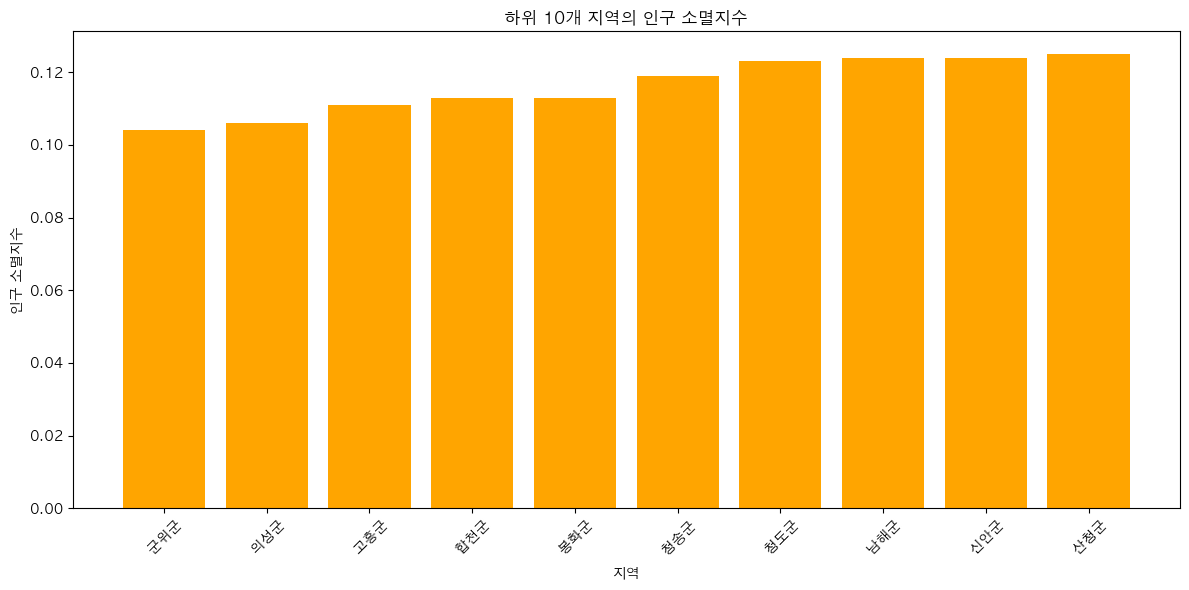

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_areas['시군구'], top_10_areas['지방소멸위험지수'], color='orange')
plt.xlabel('지역')
plt.ylabel('인구 소멸지수')
plt.title('하위 10개 지역의 인구 소멸지수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

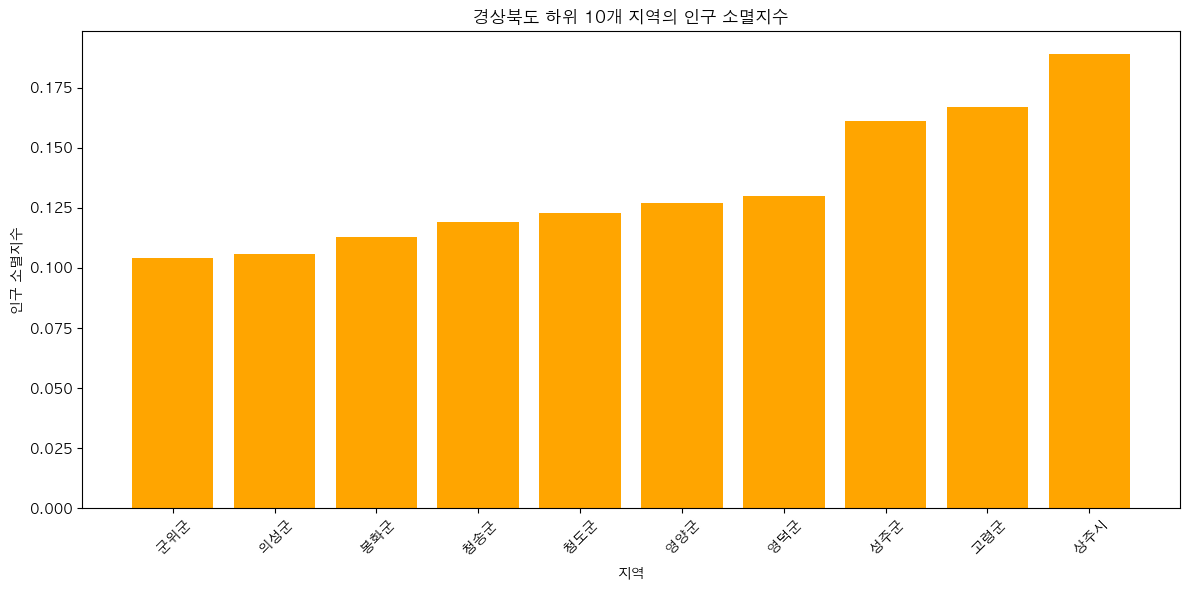

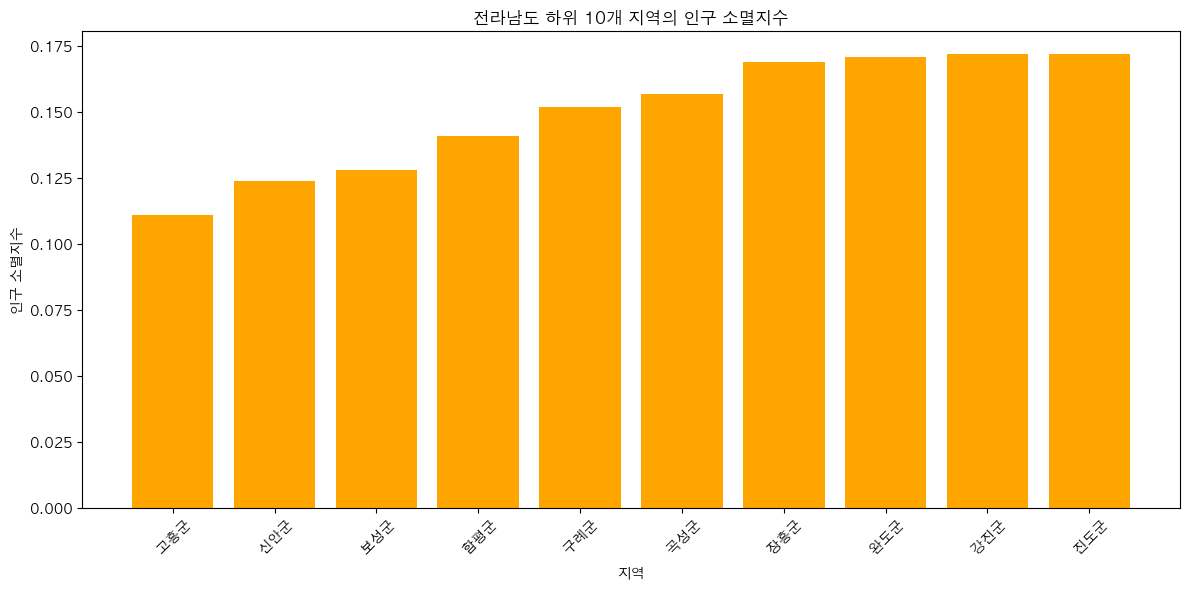

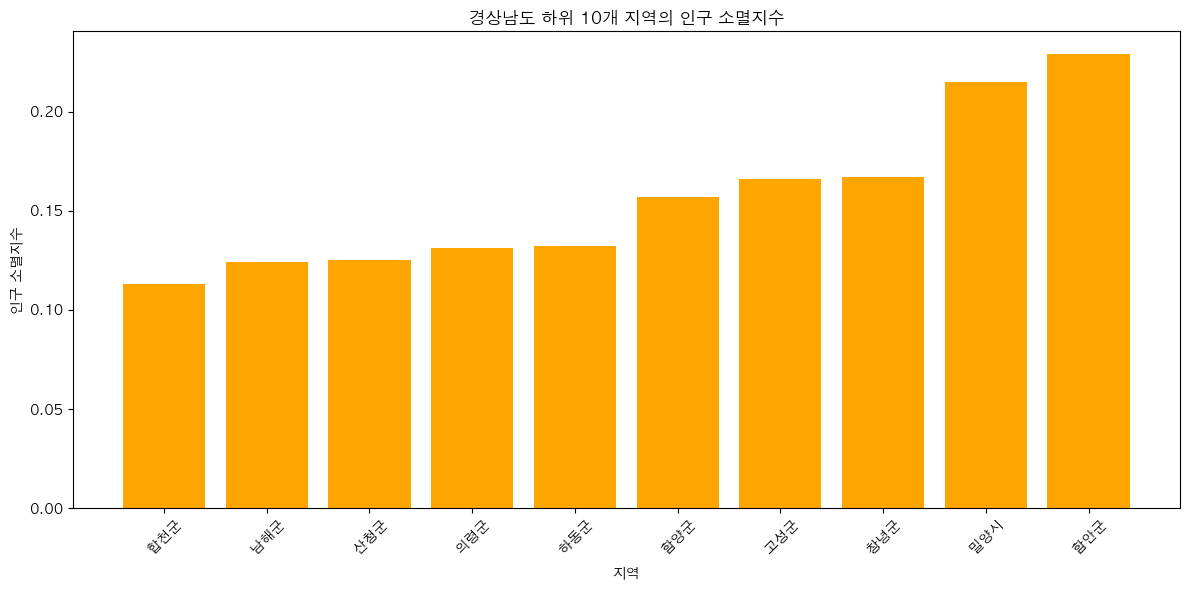

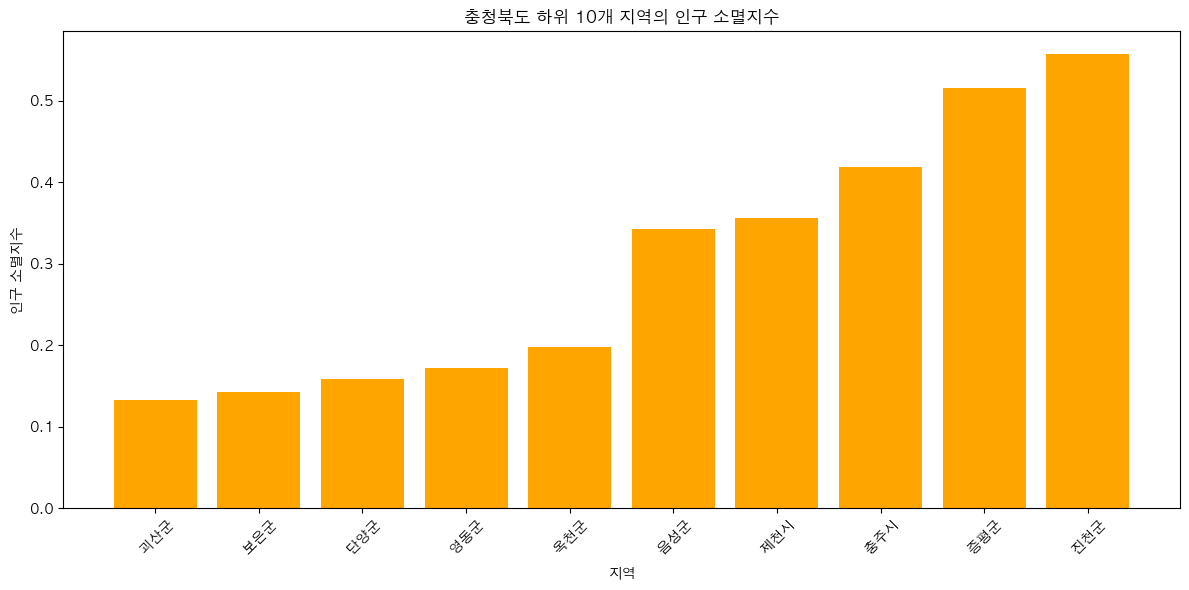

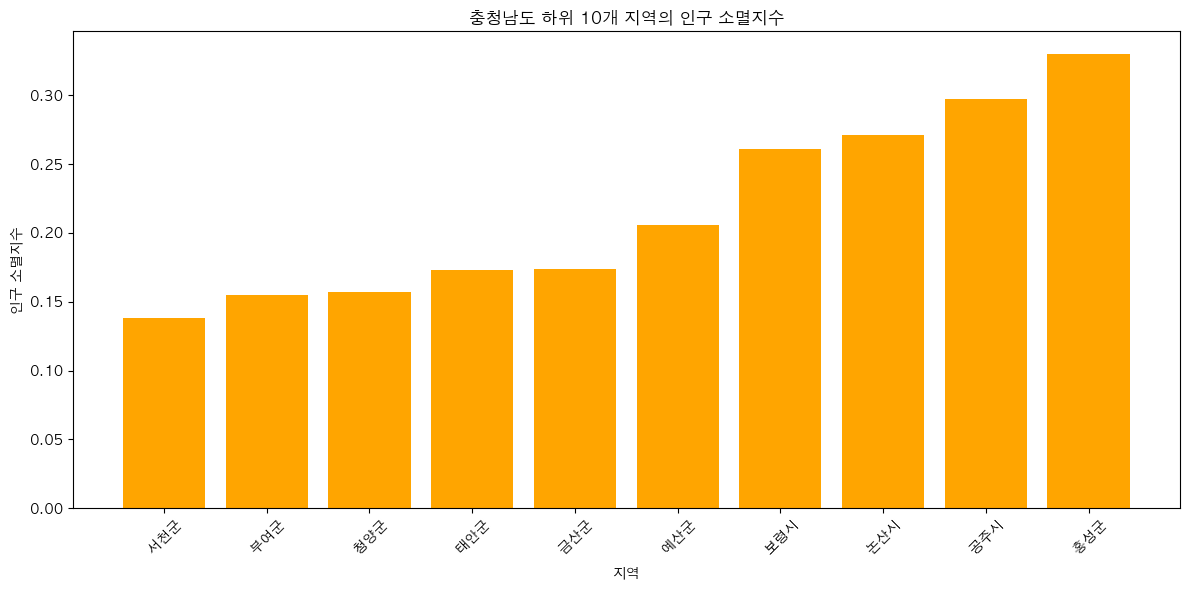

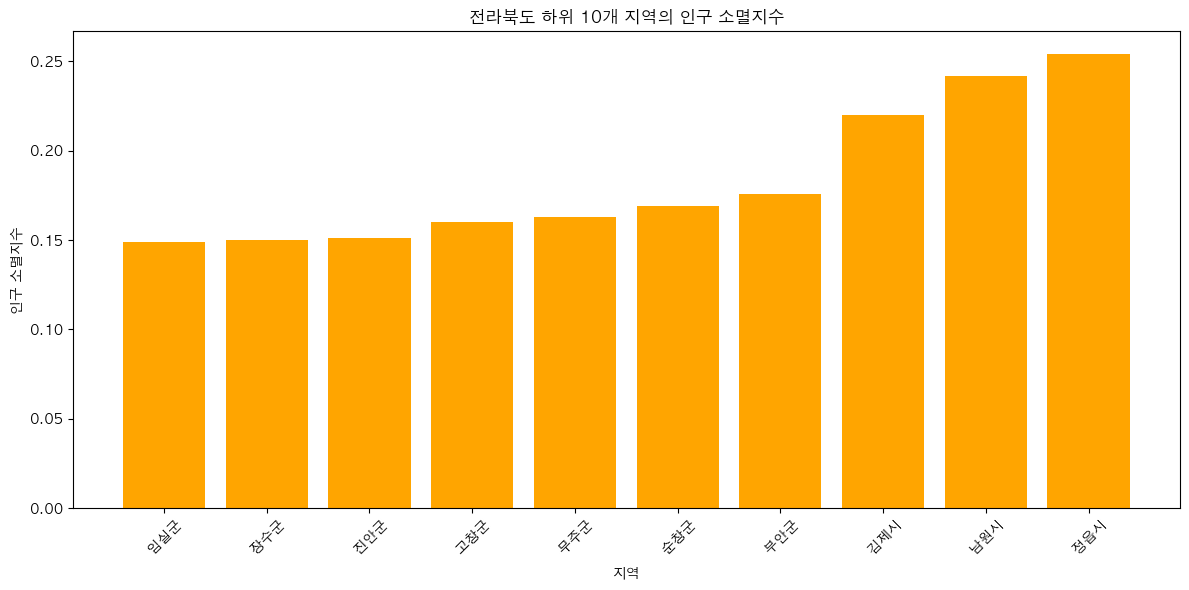

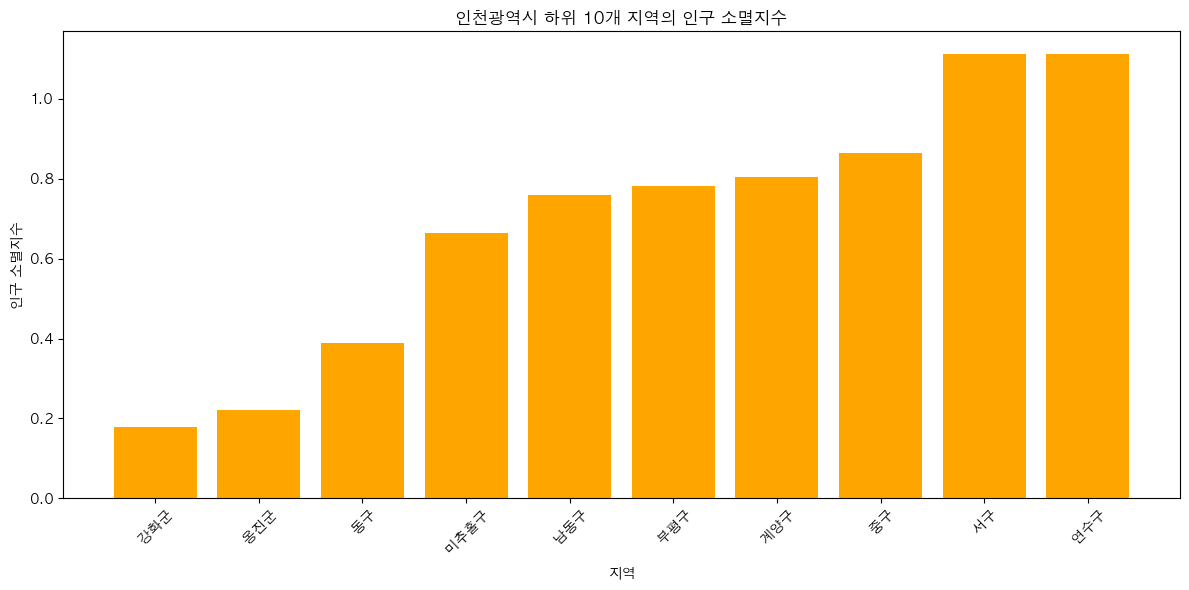

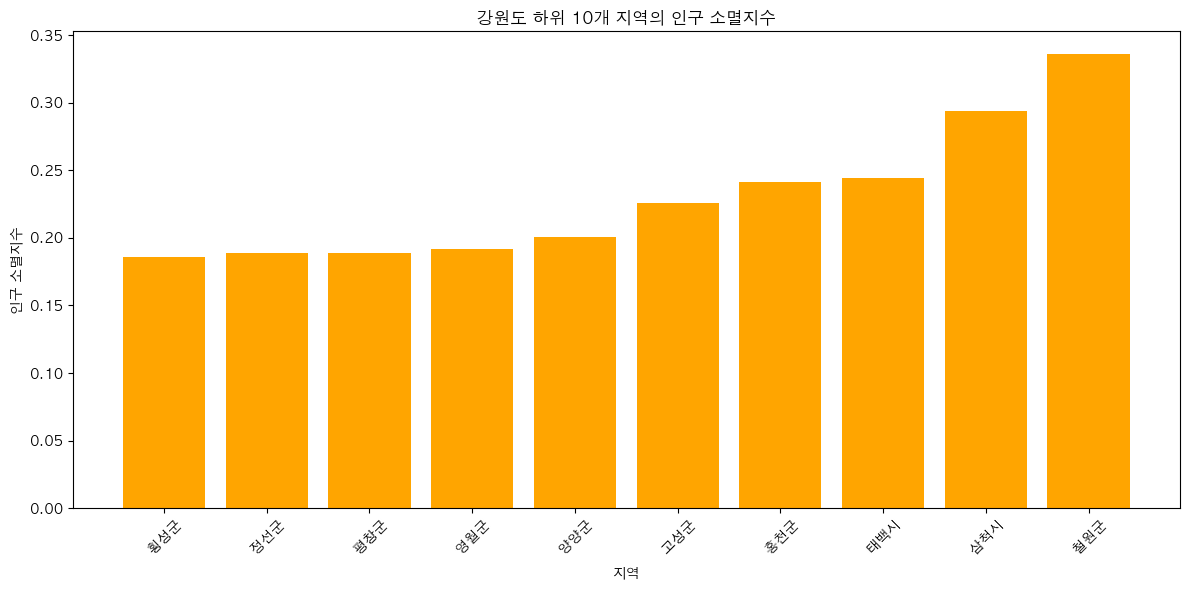

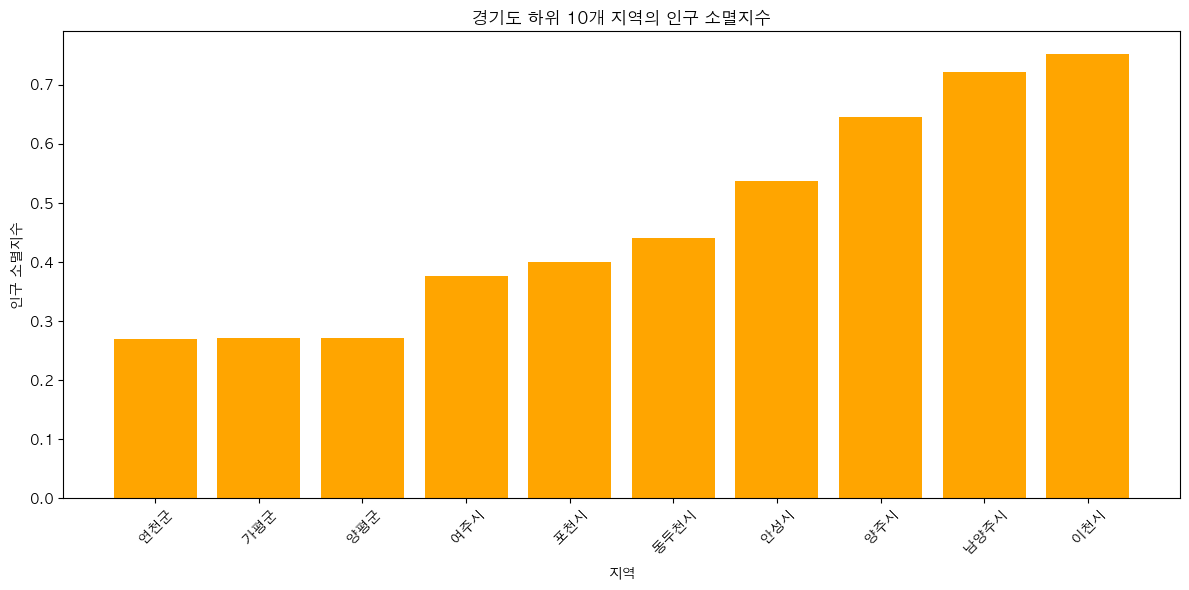

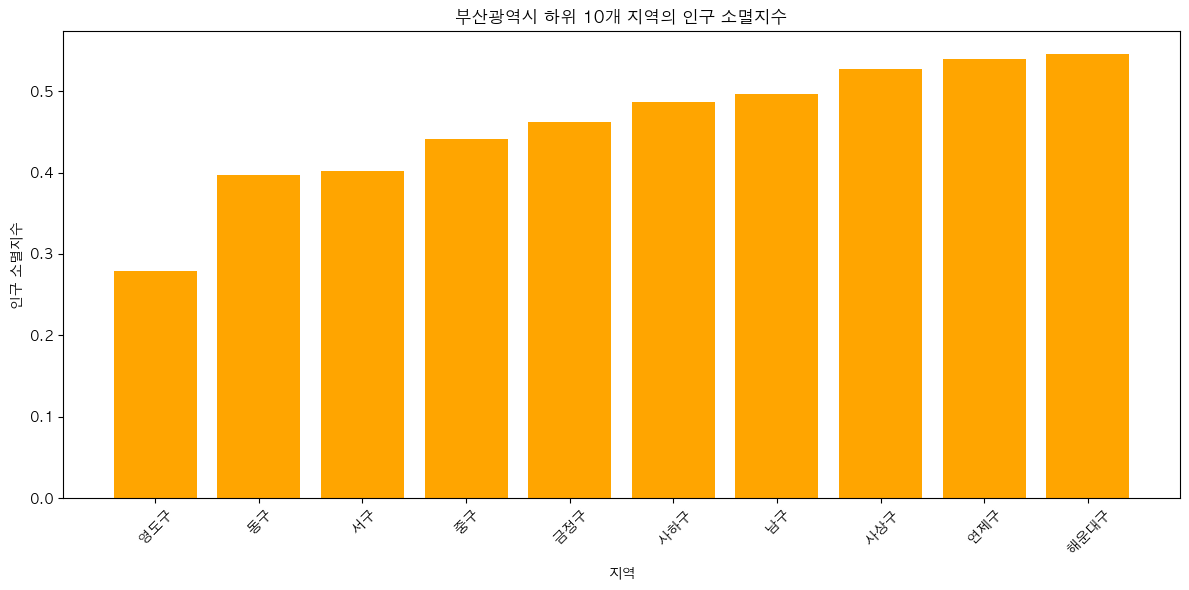

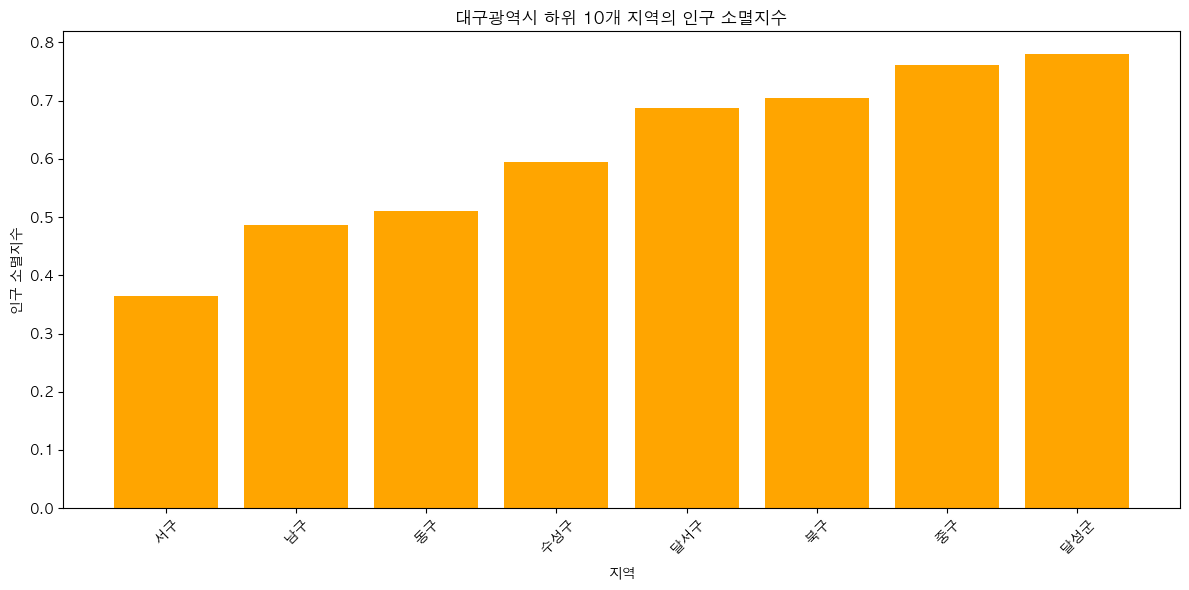

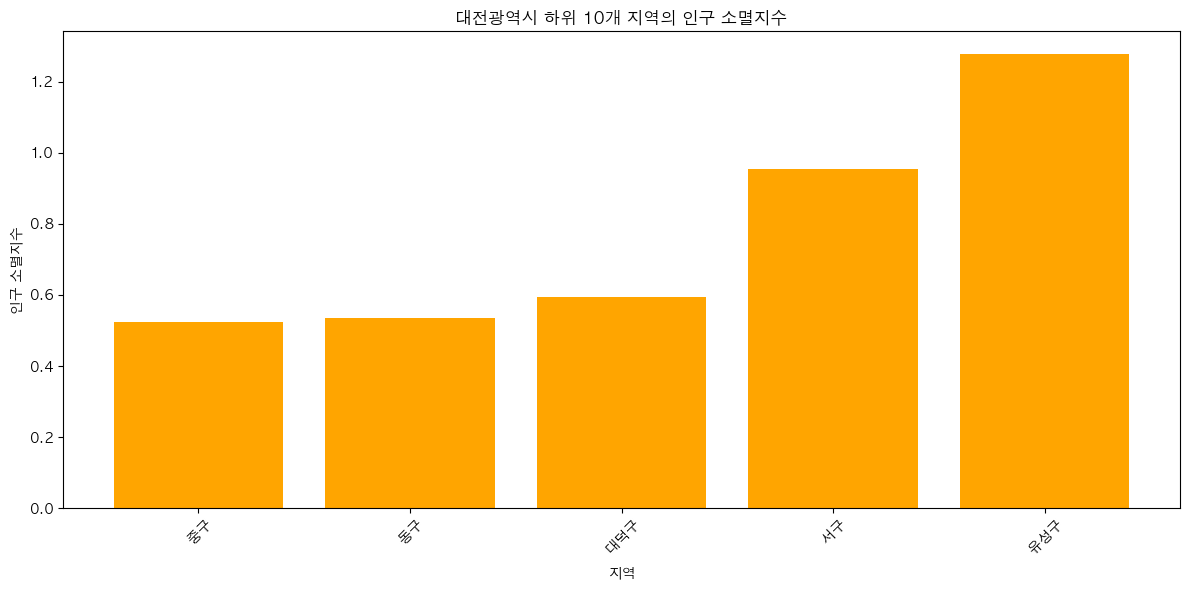

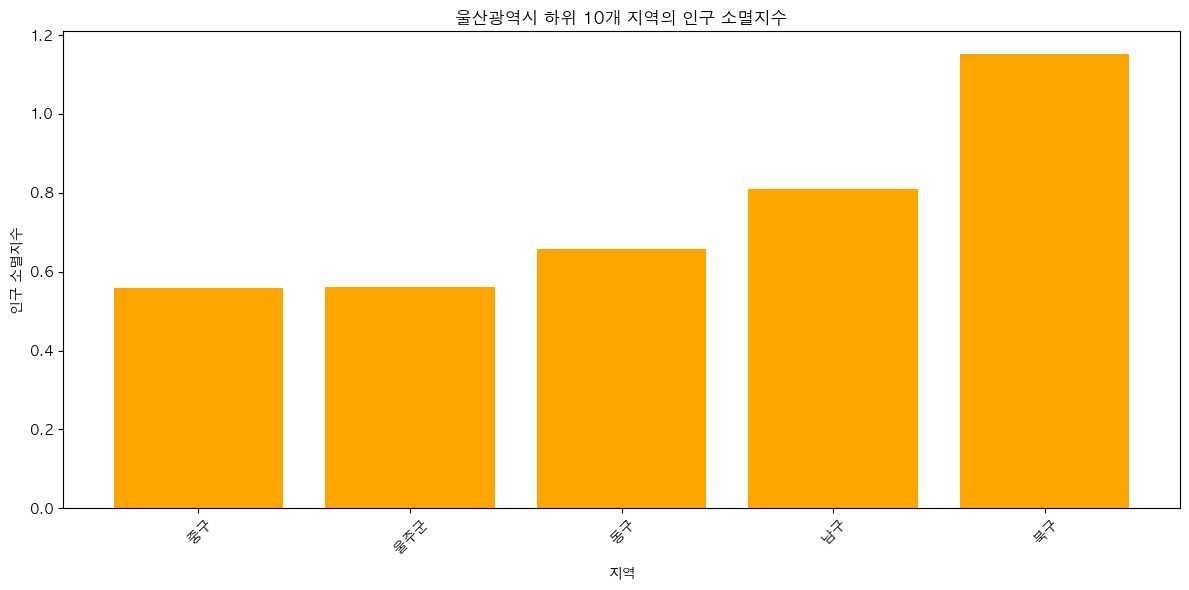

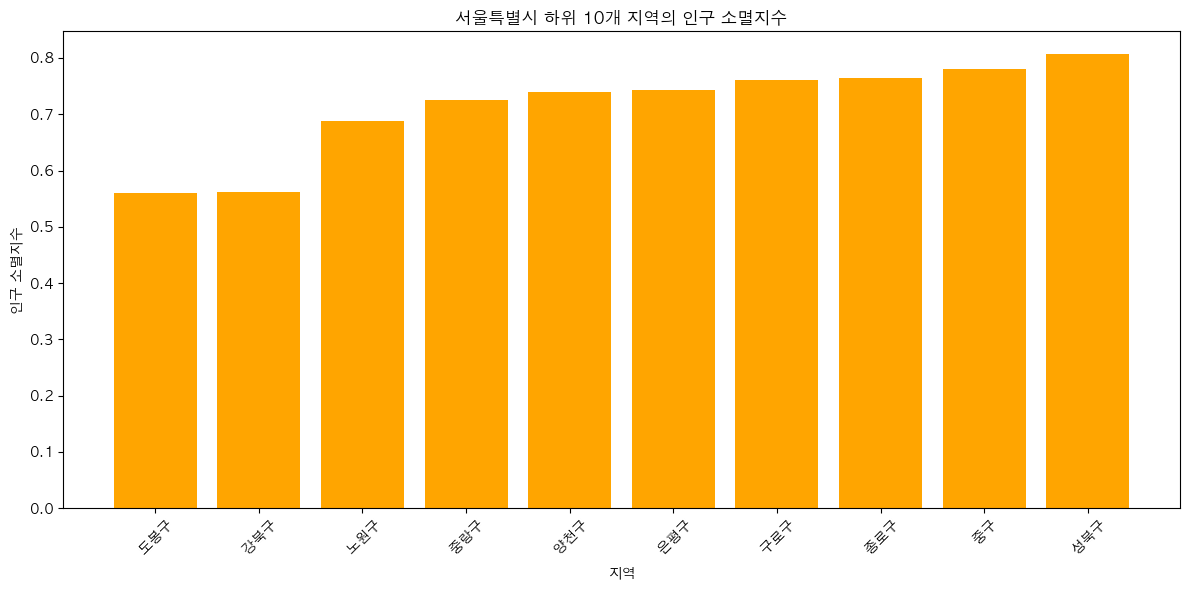

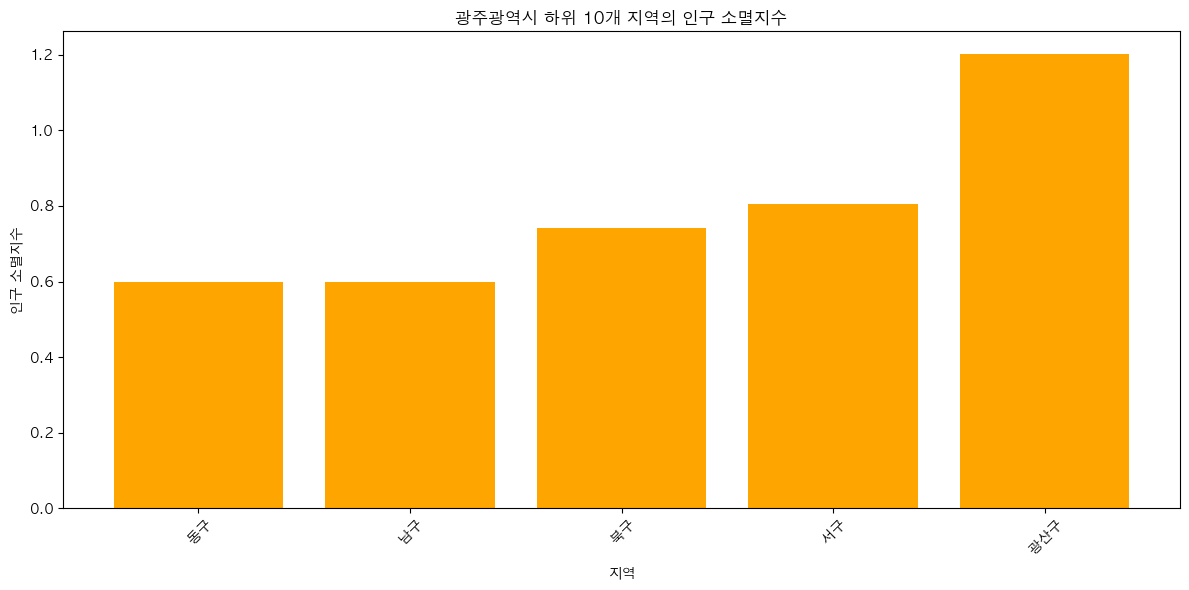

In [27]:
df_filtered = df[(df['시도'] != '제주특별자치도') & (df['시도'] != '세종특별자치시')]
sido_list = df_filtered['시도'].unique()

# 시도별로 지방소멸위험지수가 낮은 상위 10개 지역 출력
for sido in sido_list:
    sido_df = df_filtered[df_filtered['시도'] == sido]
    top_10_areas = sido_df.sort_values(by='지방소멸위험지수', ascending=True).head(10)
    
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_areas['시군구'], top_10_areas['지방소멸위험지수'], color='orange')
    plt.xlabel('지역')
    plt.ylabel('인구 소멸지수')
    plt.title(f'{sido} 하위 10개 지역의 인구 소멸지수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
min_index = df['지방소멸위험지수'].max()
max_index = df['지방소멸위험지수'].min()

df['점수매기기'] = ((df['지방소멸위험지수'] - min_index) / (max_index - min_index)) * 100
df.to_csv('./지방소멸위험점수.csv')

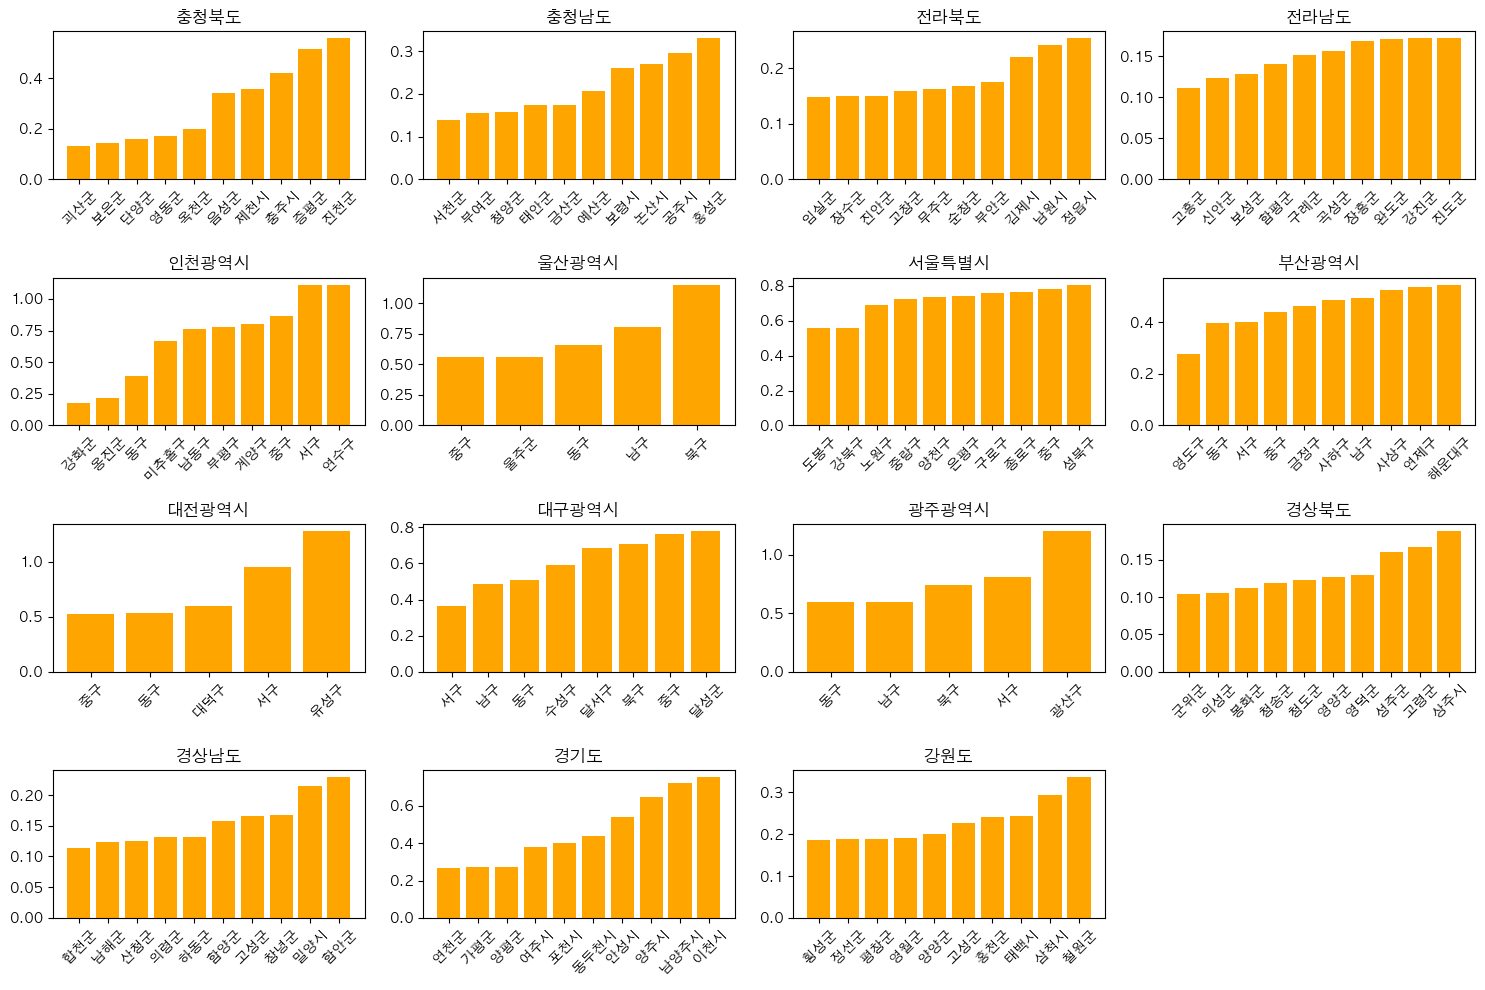

In [13]:
plt.rc('font', family='AppleGothic') #맥

# '제주특별자치도'와 '세종특별자치시'를 제외한 데이터 필터링
df_filtered = df[(df['시도'] != '제주특별자치도') & (df['시도'] != '세종특별자치시')]

# 각 시도별로 지방소멸위험지수가 낮은 상위 10개 지역 추출
top_10_areas_list = []
sido_list = df_filtered['시도'].unique()
for sido in sido_list:
    sido_df = df_filtered[df_filtered['시도'] == sido]
    top_10_areas = sido_df.sort_values(by='지방소멸위험지수', ascending=True).head(10)
    top_10_areas_list.append(top_10_areas)

# 그림을 나누고 서브플롯에 그래프 그리기
plt.figure(figsize=(15, 10))
num_subplots = len(top_10_areas_list)

for i, top_10_areas in enumerate(top_10_areas_list):
    plt.subplot(4, 4, i + 1) 
    plt.bar(top_10_areas['시군구'], top_10_areas['지방소멸위험지수'], color='orange')
    # plt.xlabel('지역')
    # plt.ylabel('인구 소멸지수')
    plt.title(f'{sido_list[i]}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()